# **import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from geopy import Point, distance
from math import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# **load Dataset**

In [ ]:
from google.colab import files
uber = files.upload()

Saving uber.csv to uber.csv


In [ ]:
df = pd.read_csv("uber.csv")

In [ ]:
df.head(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1.0
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1.0
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1.0


In [ ]:
df.tail(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [ ]:
df.shape

(200000, 9)

In [ ]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# **Data Cleansing & Preparation**

In [ ]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      1
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.drop(['key'], axis=1, inplace=True)

In [ ]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors = 'coerce')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53588.0,2.768633e+07,1.601721e+07,48.000000,1.380143e+07,2.765464e+07,4.148810e+07,5.542169e+07
fare_amount,53588.0,1.142562e+01,1.008187e+01,0.000000,6.000000e+00,8.500000e+00,1.250000e+01,3.500000e+02
pickup_longitude,53588.0,-7.252610e+01,1.123714e+01,-748.016667,-7.399208e+01,-7.398185e+01,-7.396715e+01,4.080842e+01
pickup_latitude,53588.0,3.991648e+01,6.182087e+00,-74.015515,4.073466e+01,4.075250e+01,4.076713e+01,4.503165e+01
dropoff_longitude,53588.0,-7.253933e+01,1.076547e+01,-737.916665,-7.399147e+01,-7.398013e+01,-7.396362e+01,4.082838e+01
dropoff_latitude,53588.0,3.992569e+01,6.153211e+00,-74.008745,4.073359e+01,4.075292e+01,4.076817e+01,4.503160e+01
passenger_count,53588.0,1.679760e+00,1.298933e+00,0.000000,1.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00


In [ ]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    Distance = []

    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        Distance.append(c)

    return Distance

df['Distance_km'] = distance_transform(df['pickup_longitude'].to_numpy(),
                                                df['pickup_latitude'].to_numpy(),
                                                df['dropoff_longitude'].to_numpy(),
                                                df['dropoff_latitude'].to_numpy()
                                              )

# haversine distance formula: d = 2R × sin⁻¹(√[sin²((θ₂ - θ₁)/2) + cosθ₁ × cosθ₂ × sin²((φ₂ - φ₁)/2)]).

In [ ]:
df= df.assign(Pickup_hr = df.pickup_datetime.dt.hour,
             Month = df.pickup_datetime.dt.month,
             day_of_week = df.pickup_datetime.dt.dayofweek,
             Year = df.pickup_datetime.dt.year)
df['day_name'] = pd.to_datetime(df['pickup_datetime']).dt.day_name()

# **Outliers Detection and Treatments**

Text(0, 0.5, 'fare_amount')

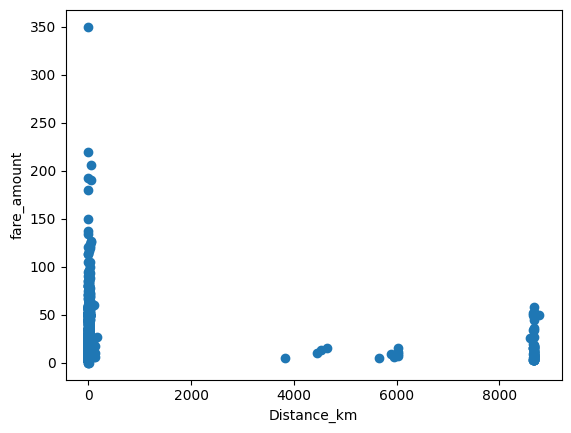

In [ ]:
plt.scatter(df['Distance_km'], df['fare_amount'])
plt.xlabel("Distance_km")
plt.ylabel("fare_amount")

Text(0, 0.5, 'passenger_count')

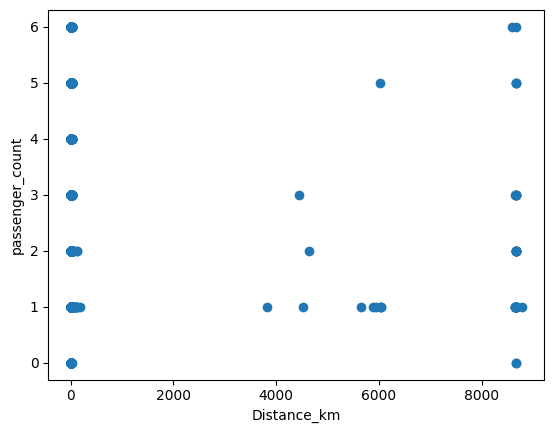

In [ ]:
plt.scatter(df['Distance_km'], df['passenger_count'])
plt.xlabel("Distance_km")
plt.ylabel("passenger_count")

In [ ]:
df.drop(df[df['Distance_km'] == 0].index, inplace = True)
df.drop(df[df['Distance_km'] > 60].index, inplace = True)
df.drop(df[df['fare_amount'] > 100].index, inplace = True)
df.drop(df[df['fare_amount'] < 0].index, inplace = True)
df.drop(df[df['passenger_count'] > 6].index, inplace = True)


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34630 entries, 0 to 35723
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Unnamed: 0         34630 non-null  int64              
 1   fare_amount        34630 non-null  float64            
 2   pickup_datetime    34630 non-null  datetime64[ns, UTC]
 3   pickup_longitude   34630 non-null  float64            
 4   pickup_latitude    34630 non-null  float64            
 5   dropoff_longitude  34630 non-null  float64            
 6   dropoff_latitude   34630 non-null  float64            
 7   passenger_count    34630 non-null  float64            
 8   Distance_km        34630 non-null  float64            
 9   Pickup_hr          34630 non-null  int64              
 10  Month              34630 non-null  int64              
 11  day_of_week        34630 non-null  int64              
 12  Year               34630 non-null  int64      

<Figure size 1000x600 with 0 Axes>

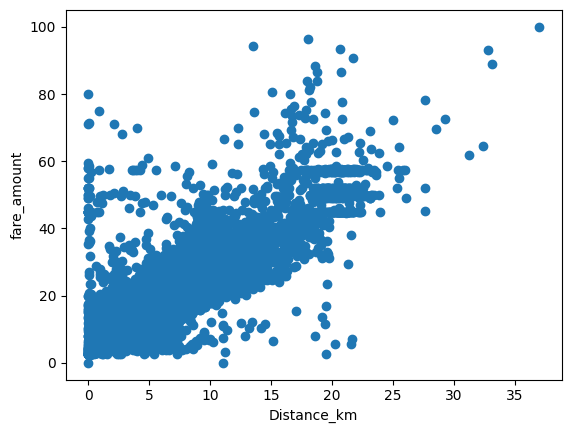

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.scatter(df['Distance_km'], df['fare_amount'])
plt.xlabel("Distance_km")
plt.ylabel("fare_amount")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

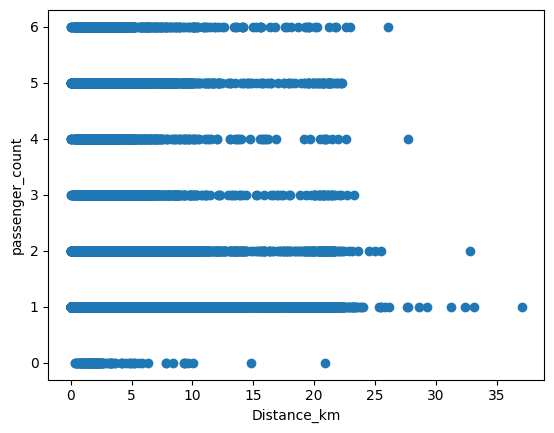

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.scatter(df['Distance_km'], df['passenger_count'])
plt.xlabel("Distance_km")
plt.ylabel("passenger_count")
plt.figure(figsize=(10, 6))

# **Descriptive Analysis and Visualization**

In [ ]:
df['Count'] = 1

Average trips a year: 
[2009, 2010, 2011, 2012, 2013, 2014, 2015] [29757, 29157, 30756, 31180, 30387, 29093, 13456]


<BarContainer object of 7 artists>

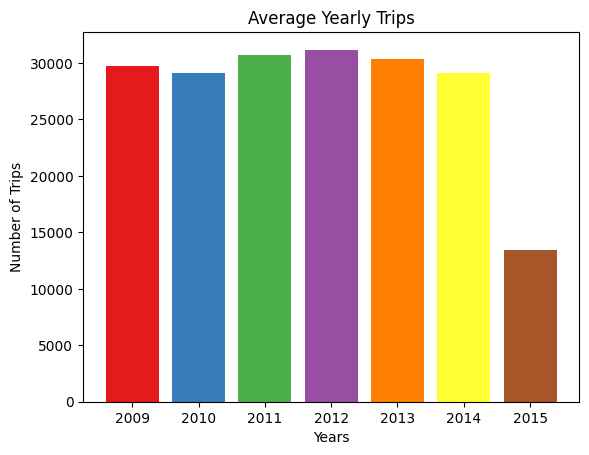

In [ ]:
no_of_trips = []
year = [2009, 2010, 2011, 2012, 2013, 2014, 2015]

colors = sns.color_palette('Set1')

for i in range(2009, 2016):
    x = df.loc[df['Year'] == i, 'Count'].sum()
    no_of_trips.append(x)

print("Average trips a year: ")
print(year, no_of_trips)


plt.title("Average Yearly Trips")
plt.xlabel("Years")
plt.ylabel("Number of Trips")

plt.bar(year, no_of_trips, color=colors)

Average trips a Month: 
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] [17153, 16160, 18194, 18036, 18280, 17230, 14602, 13691, 14802, 15720, 14848, 15070]


<BarContainer object of 12 artists>

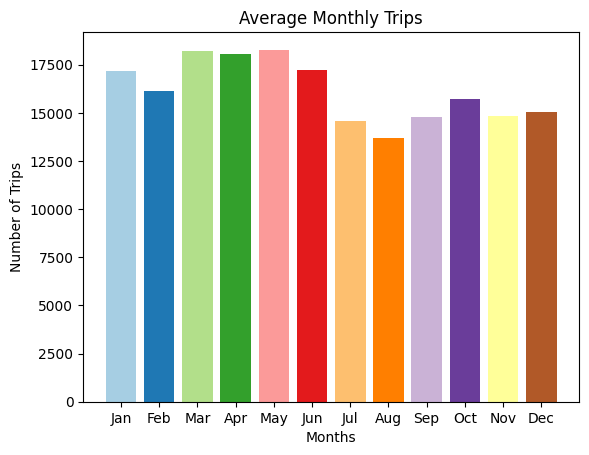

In [ ]:
no_of_trips = []
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

colors = sns.color_palette('Paired')

for i in range(1, 13):
    x = df.loc[df['Month'] == i, 'Count'].sum()
    no_of_trips.append(x)

print("Average trips a Month: ")
print(month, no_of_trips)


plt.title("Average Monthly Trips")
plt.xlabel("Months")
plt.ylabel("Number of Trips")

plt.bar(month, no_of_trips, color=colors)

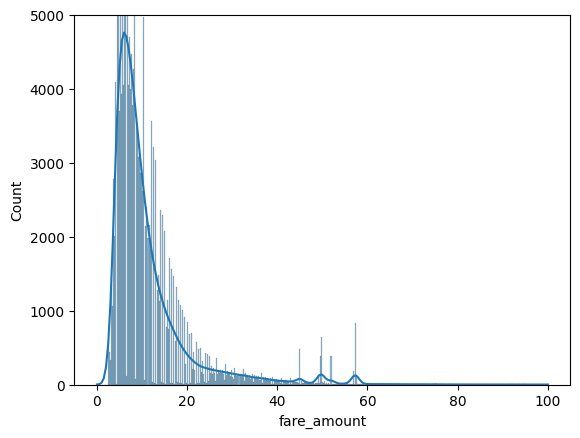

In [ ]:
sns.histplot(df['fare_amount'],kde=True)
plt.ylim(0,5000);

Average trips by Days: 
['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'] [24422, 27284, 28115, 29100, 29908, 29353, 25604]


<BarContainer object of 7 artists>

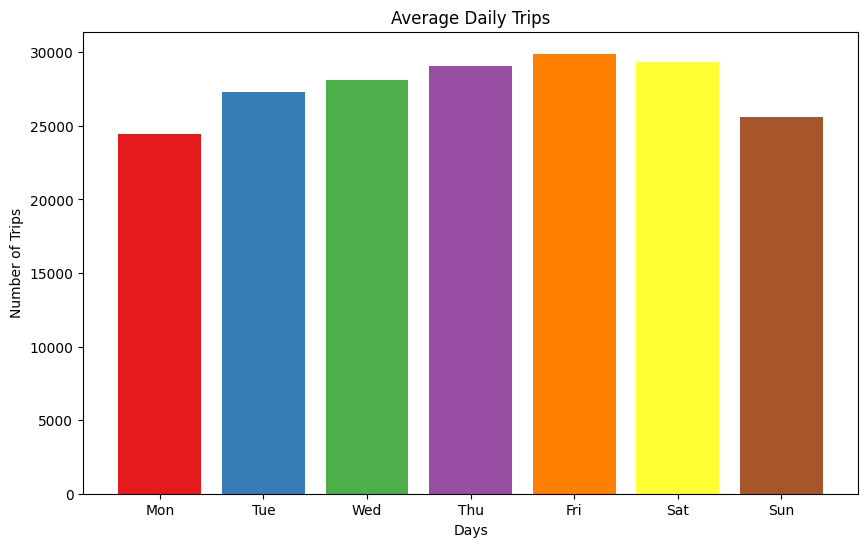

In [ ]:
no_of_trips = []
day = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

colors = sns.color_palette('Set1')

for i in range(0, 7):
    x = df.loc[df['day_of_week'] == i, 'Count'].sum()
    no_of_trips.append(x)

print("Average trips by Days: ")
print(day, no_of_trips)

plt.figure(figsize=(10, 6))
plt.title("Average Daily Trips")
plt.xlabel("Days")
plt.ylabel("Number of Trips")

plt.bar(day, no_of_trips, color=colors)

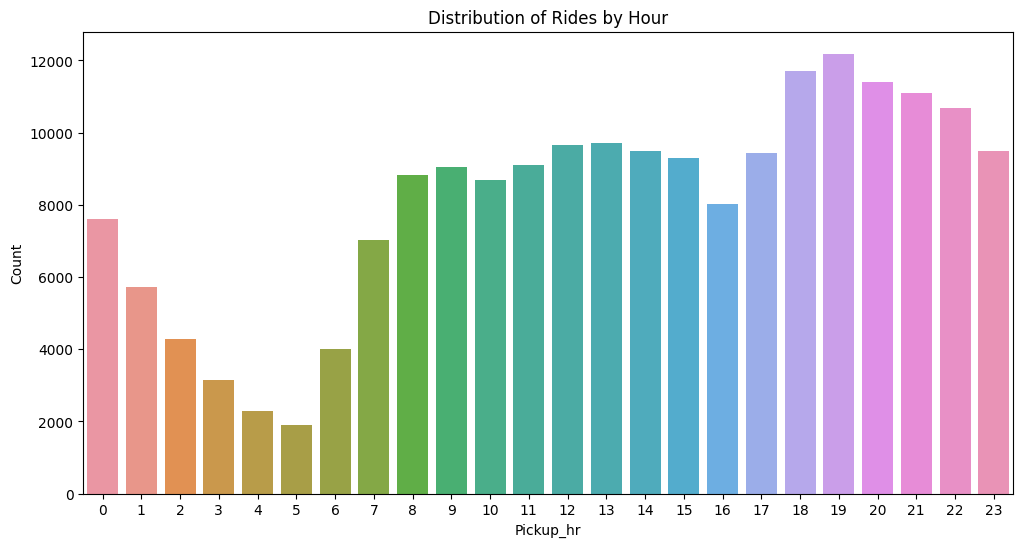

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Pickup_hr', data=df)
plt.title('Distribution of Rides by Hour')
plt.xlabel('Pickup_hr')
plt.ylabel('Count')
plt.show()

In [ ]:
df_1 = df[['Distance_km', 'day_of_week', 'Pickup_hr']].copy()

df_H = df_1.copy()

df_H = df_H.groupby(['Pickup_hr', 'day_of_week']).mean()
df_H = df_H.unstack(level=0)

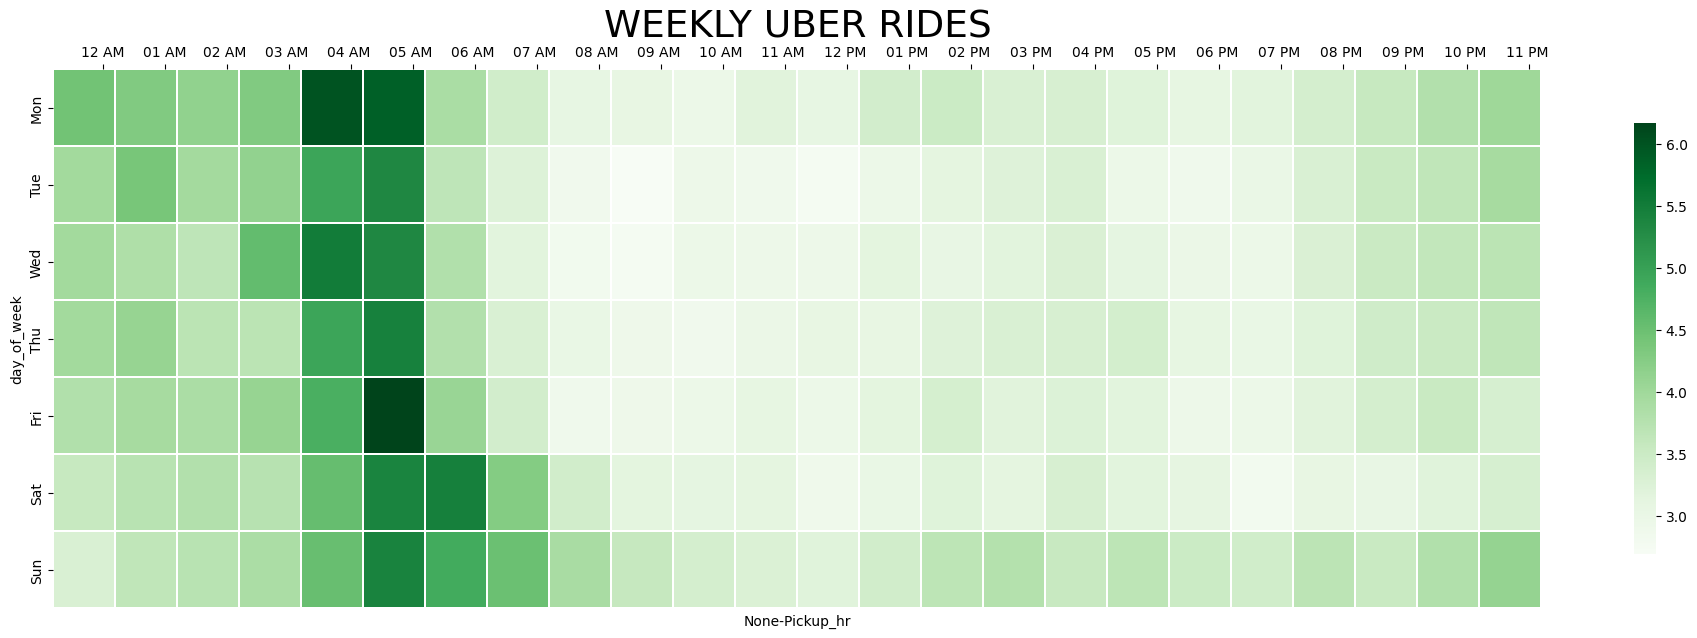

In [ ]:
fig, ax = plt.subplots(figsize=(24, 7))
sns.heatmap(df_H, cmap="Greens",
           linewidth=.3, cbar_kws={"shrink": .8})

xticks_labels = ['12 AM', '01 AM', '02 AM ', '03 AM ', '04 AM ', '05 AM ', '06 AM ', '07 AM ',
                 '08 AM ', '09 AM ', '10 AM ', '11 AM ', '12 PM ', '01 PM ', '02 PM ', '03 PM ',
                 '04 PM ', '05 PM ', '06 PM ', '07 PM ', '08 PM ', '09 PM ', '10 PM ', '11 PM ']

yticks_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

plt.xticks(np.arange(24) + .8, labels=xticks_labels)
plt.yticks(np.arange(7) + .5, labels=yticks_labels)

ax.xaxis.tick_top()

title = 'Weekly Uber Rides'.upper()
plt.title(title, fontdict={'fontsize': 27})

plt.show()

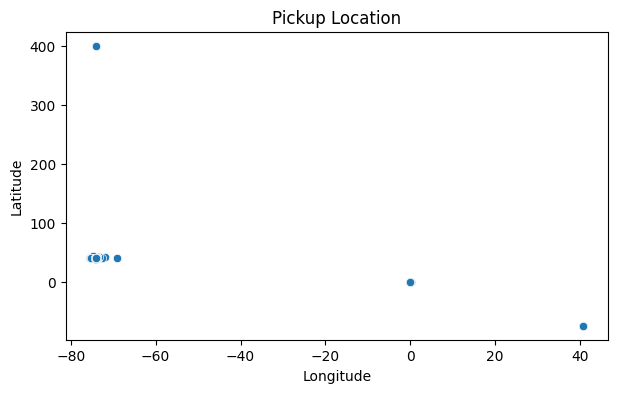

In [ ]:
plt.figure(figsize=(7, 4))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df)
plt.title('Pickup Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

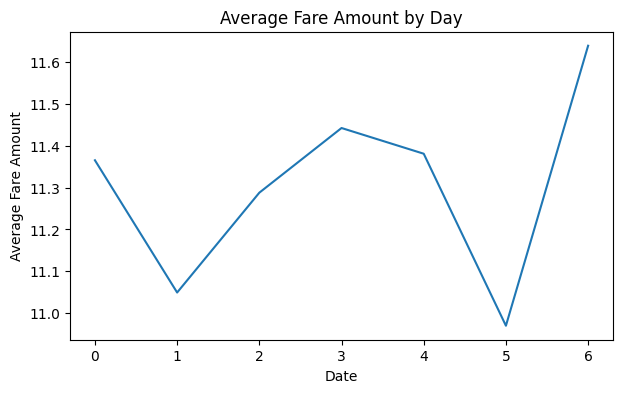

In [ ]:
daily_average = df.groupby('day_of_week')['fare_amount'].mean()

# Plot the average fare amount by day
plt.figure(figsize=(7, 4))
daily_average.plot()
plt.title('Average Fare Amount by Day')
plt.xlabel('Date')
plt.ylabel('Average Fare Amount')
plt.show()

# **Data Splitting and Scaling**

In [ ]:
from sklearn.linear_model import *
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [ ]:
X=features = df[['passenger_count','Distance_km','Pickup_hr','Month','day_name']]

In [ ]:
y=target = df['fare_amount']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
for i in X:
  X[i] = lb.fit_transform(X[i])

lb1 = LabelEncoder()
for i in X_train:
  X_train[i] = lb1.fit_transform(X_train[i])

lb2 = LabelEncoder()
for i in X_test:
  X_test[i] = lb2.fit_transform(X_test[i])

<ipython-input-32-49980a07f30b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = lb.fit_transform(X[i])
<ipython-input-32-49980a07f30b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = lb.fit_transform(X[i])
<ipython-input-32-49980a07f30b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

# **Standard Scalling**

In [ ]:
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

X_train.shape

(42870, 5)

# **Linear Regression**

In [ ]:
lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)

rmae = mean_absolute_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred)
rrmse= np.sqrt(mean_squared_error(y_test,y_pred))
rr2  = r2_score(y_test,y_pred)

print("mean absolute error:",rmae)
print("mean squared error:",rmse)
print("root mean squared error:",rmse)
print("r2-score:",rr2)

mean absolute error: 7.33458967260361
mean squared error: 136.72868290072842
root mean squared error: 136.72868290072842
r2-score: -0.3874768753325417


# **Ridge Regression**

In [ ]:
rid = Ridge()
rid.fit(X_train,y_train)
y_pred=rid.predict(X_test)

Rmae = mean_absolute_error(y_test,y_pred)
Rmse = mean_squared_error(y_test,y_pred)
Rrmse= np.sqrt(mean_squared_error(y_test,y_pred))
Rr2  = r2_score(y_test,y_pred)

print("mean absolute error:",Rmae)
print("mean squared error:",Rmse)
print("root mean squared error:",Rrmse)
print("r2-score:",Rr2)

mean absolute error: 7.334420384456974
mean squared error: 136.72650106714084
root mean squared error: 11.693010778543773
r2-score: -0.3874547348161237


# **Lasso Regression**

In [ ]:
las = Lasso()
las.fit(X_train,y_train)
y_pred=las.predict(X_test)

lmae = mean_absolute_error(y_test,y_pred)
lmse = mean_squared_error(y_test,y_pred)
lrmse= np.sqrt(mean_squared_error(y_test,y_pred))
lr2  = r2_score(y_test,y_pred)
accl  =metrics.accuracy_score(y_test,y_pred)


print("mean absolute error:",lmae)
print("mean squared error:",lmse)
print("root mean squared error:",lrmse)
print("r2-score:",lr2)
print("Accuracy : ",accl)


# **Summary**

In [ ]:
data = [['Linear',rmae,rmse,rrmse,rr2], ['Lasso',Rmae,Rmse,Rrmse,Rr2], ['Ridge',lmae,lmse,lrmse,lr2]]
summary = pd.DataFrame(data, columns=['Model', 'Mean Absolute Error','Mean Squred Error','Root Mean Squared Error','R2 Score'])

summary

,Model,Mean Absolute Error,Mean Squred Error,Root Mean Squared Error,R2 Score
0,Linear,7.972638,130.144749,11.408100,-0.569258
1,Lasso,7.972346,130.140580,11.407917,-0.569208
2,Ridge,6.682597,113.470945,10.652274,-0.368209


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor

# **KNN Classifier**

In [ ]:
knn = KNeighborsRegressor()

knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

kmae = mean_absolute_error(y_test,y_pred)
kmse = mean_squared_error(y_test,y_pred)
krmse= np.sqrt(mean_squared_error(y_test,y_pred))
kr2  = r2_score(y_test,y_pred)

print("mean absolute error:",kmae)
print("mean squared error:",kmse)
print("root mean squared error:",krmse)
print("r2-score:",kr2)

mean absolute error: 6.14214553855039
mean squared error: 111.96054861334103
root mean squared error: 10.581141177271052
r2-score: -0.34999676343823394


# **Decision Tree**

In [ ]:
Dtree = DecisionTreeRegressor()

Dtree.fit(X_train,y_train)
y_pred=Dtree.predict(X_test)

dmae = mean_absolute_error(y_test,y_pred)
dmse = mean_squared_error(y_test,y_pred)
drmse= np.sqrt(mean_squared_error(y_test,y_pred))
dr2  = r2_score(y_test,y_pred)

print("mean absolute error:",dmae)
print("mean squared error:",dmse)
print("root mean squared error:",drmse)
print("r2-score:",dr2)

mean absolute error: 6.520734911926076
mean squared error: 122.17451364423908
root mean squared error: 11.053258055625006
r2-score: -0.4731546070211887


# **Linear SVR**

In [ ]:
svr = LinearSVR()

svr.fit(X_train,y_train)
y_pred=svr.predict(X_test)

smae = mean_absolute_error(y_test,y_pred)
smse = mean_squared_error(y_test,y_pred)
srmse= np.sqrt(mean_squared_error(y_test,y_pred))
sr2  = r2_score(y_test,y_pred)

print("mean absolute error:",smae)
print("mean squared error:",smse)
print("root mean squared error:",srmse)
print("r2-score:",sr2)

mean absolute error: 6.687666386691092
mean squared error: 116.8587628808291
root mean squared error: 10.81012316677424
r2-score: -0.40905840157447226


# **Summary**

In [ ]:
data=[['Decision Tree',dmae,dmse,drmse,dr2],['KNN Reg',kmae,kmse,krmse,kr2],['Linear SVR',smae,smse,srmse,sr2]]
summary2 = pd.DataFrame(data,columns=['Model', 'Mean Absolute Error','Mean Squred Error','Root Mean Squared Error','R2 Score'])

summary2

,Model,Mean Absolute Error,Mean Squred Error,Root Mean Squared Error,R2 Score
0,Decision Tree,6.520735,122.174514,11.053258,-0.473155
1,KNN Reg,6.142146,111.960549,10.581141,-0.349997
2,Linear SVR,6.687666,116.858763,10.810123,-0.409058


# **Data Source**

https://drive.google.com/file/d/1tKJLVS7e1m_x_7DoBPpOH6LBFrUhYMnM/view?usp=drive_link